<div style="text-align: center; font-size: 35px;">
     Data Exploration: Sample SuperStore Dataset
 </div>

 ##### The objective of this notebook is to deliver a concise and easy-to-follow short of the Sample SuperStore dataset exploration process. And from what I gather, it comes from the yearly sales numbers of a fictitious internet retailer. Now, using the Jupyter Notebook as our primary IDE of choice, let's dive in and attempt to further investigate the dataset using the many built-in features of the Panda's library for Python. 

##### Installing Requirements.txt

In [2]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


 ##### Importing Library

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

##### Reading Dataset

###### The file path mentioned corresponds to my computer setup. You can replace it with your own path to access the sample-superstore.xls file. In my case, I have it saved as an .xls file." 

In [4]:
path=r"D:\my_git\SuperStore-sales-dahsboard\data\Sample - Superstore.xls"
df=pd.read_excel(path)

##### Exploring the Dataset

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [7]:
df.shape

(9994, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#### Creating new columns to visualize the data

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')

##### Visaulizing the data 

In [13]:
def plot_count(column, title):
    sns.countplot(x=column, data=df)
    plt.title(title)
    plt.show()

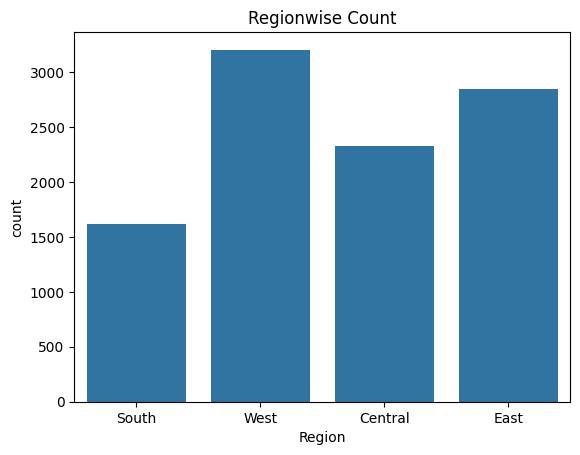

In [14]:
plot_count("Region", "Regionwise Count")


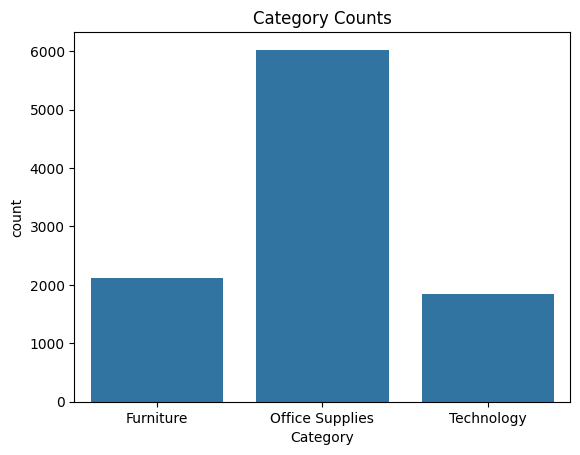

In [15]:
plot_count("Category", "Category Counts")

C:\Users\briyani\AppData\Local\Temp\ipykernel_46008\881960743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Sub-Category",data=df,palette='rainbow')


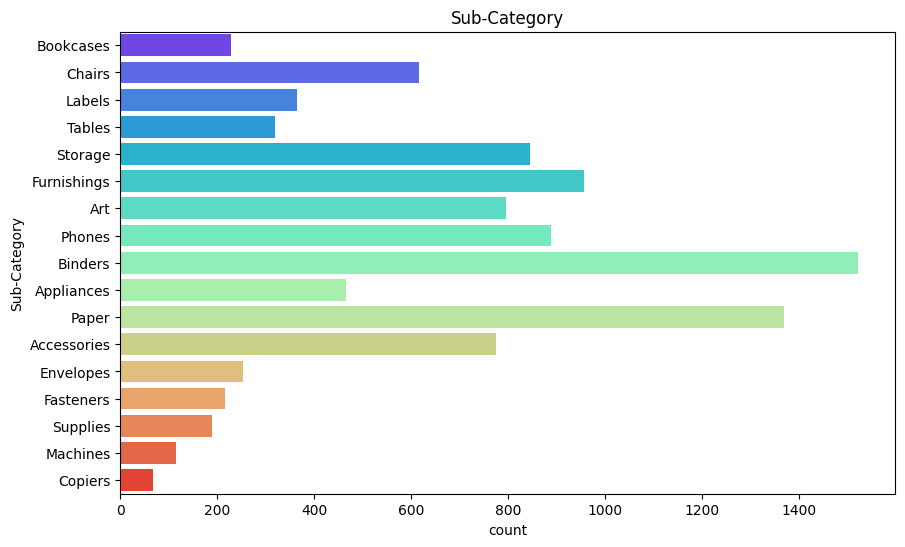

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y="Sub-Category",data=df,palette='rainbow')
plt.title("Sub-Category")
plt.show()

 ##### Total profit by category

In [17]:
top_products=df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

C:\Users\briyani\AppData\Local\Temp\ipykernel_46008\827944557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values,y=top_products.keys(),palette="Blues_r")


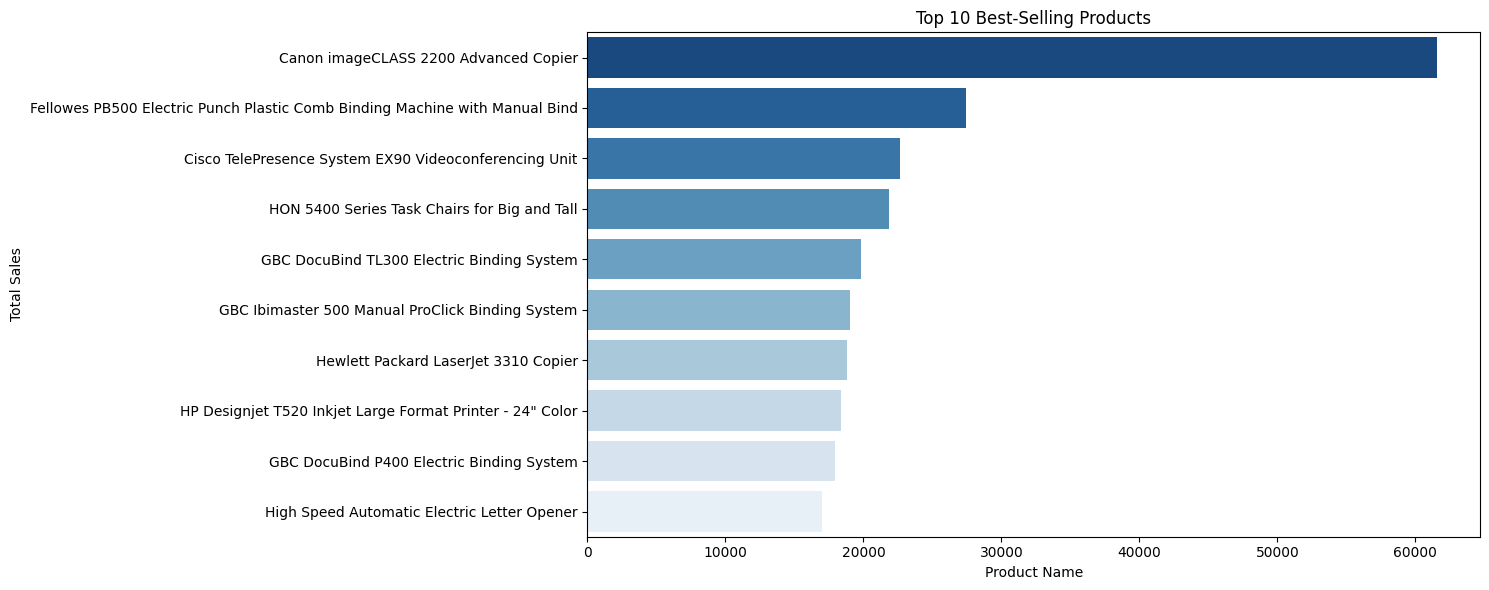

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_products.values,y=top_products.keys(),palette="Blues_r")
plt.title('Top 10 Best-Selling Products')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [19]:
profit=df.groupby("Category")["Profit"].sum().sort_values()

C:\Users\briyani\AppData\Local\Temp\ipykernel_46008\2674798544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit.values,y=profit.index,palette='coolwarm')


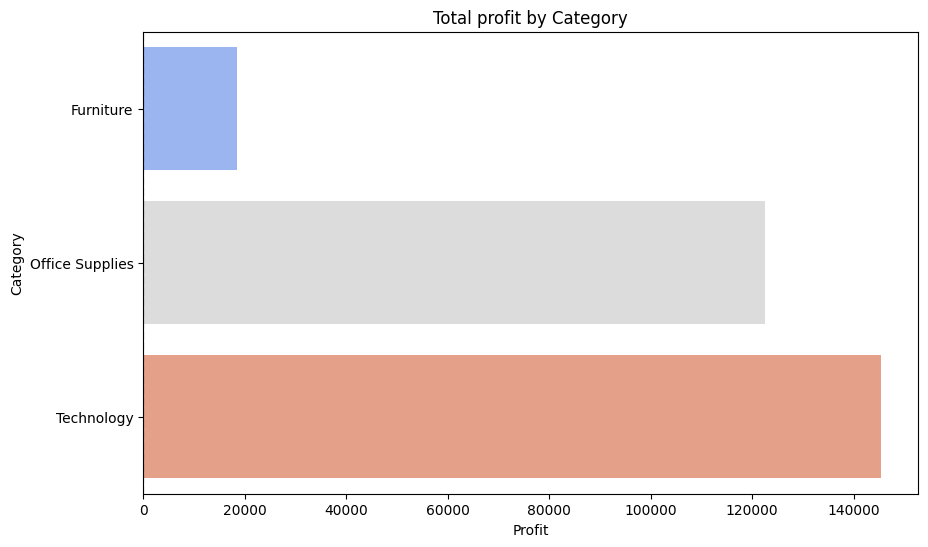

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=profit.values,y=profit.index,palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title("Total profit by Category")
plt.ylabel('Category')
plt.xlabel('Profit')
plt.show()



In [21]:
sub_profit=df.groupby("Sub-Category")['Profit'].sum().sort_values()

C:\Users\briyani\AppData\Local\Temp\ipykernel_46008\3626780176.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_profit.values,y=sub_profit.index,palette='coolwarm')


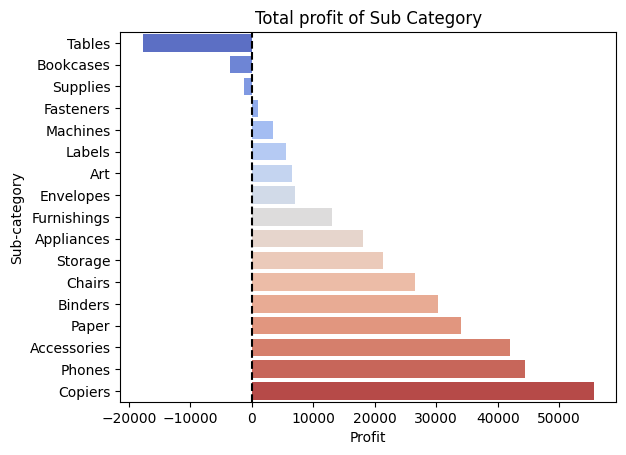

In [22]:
sns.barplot(x=sub_profit.values,y=sub_profit.index,palette='coolwarm')
plt.xlabel("Profit")
plt.ylabel('Sub-category')
plt.title("Total profit of Sub Category")
plt.axvline(0, color='black', linestyle='--')
plt.show()



In [23]:
#Group by Yearmonth and sales 
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
#changing the yearmonth to string type 
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

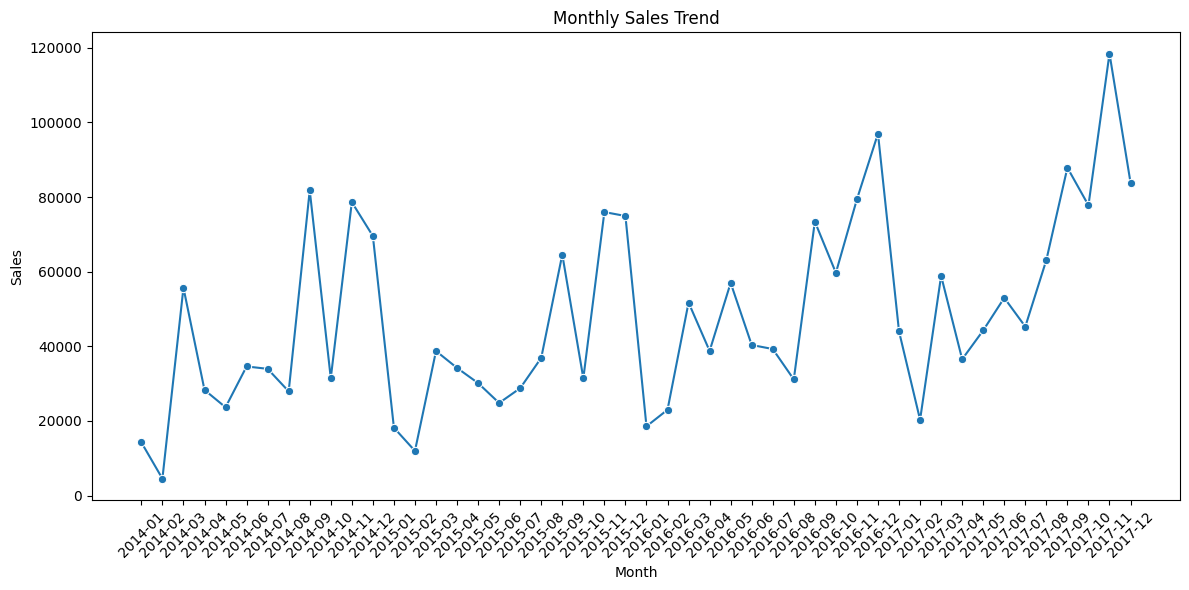

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\briyani\AppData\Local\Temp\ipykernel_46008\749709905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Month'] = df_2014['YearMonth'].dt.month


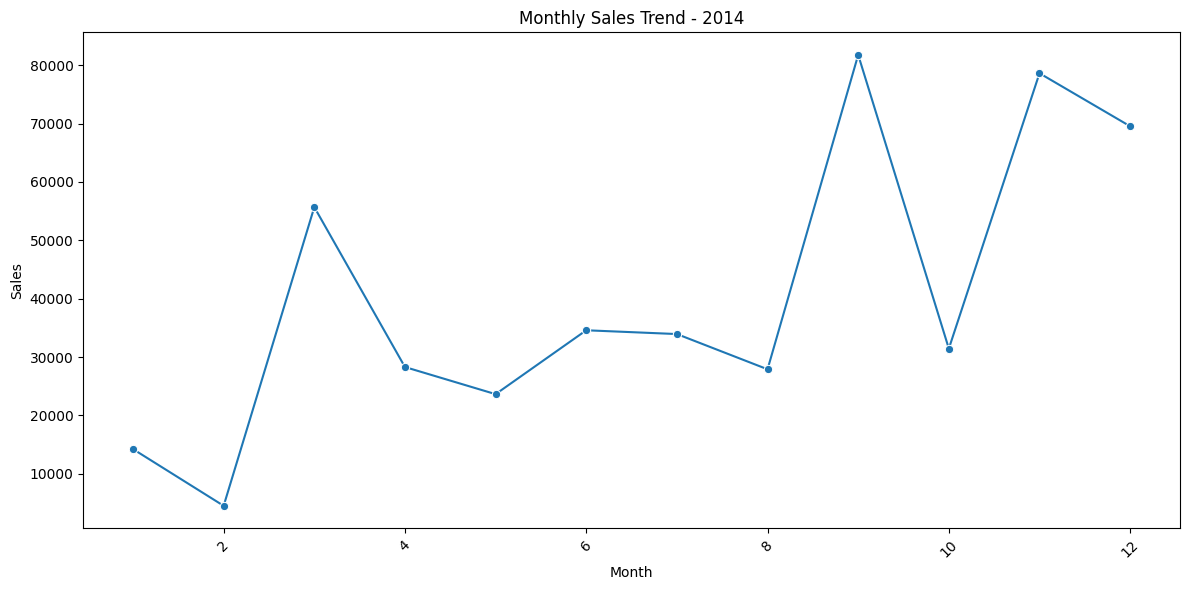

In [25]:
df_2014 = df[df['YearMonth'].dt.year == 2014]

df_2014['Month'] = df_2014['YearMonth'].dt.month
monthly_sales_2014 = df_2014.groupby('Month')['Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_2014, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend - 2014')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
numeric=df[["Sales","Profit","Discount","Quantity"]]

In [27]:
corr=numeric.corr()

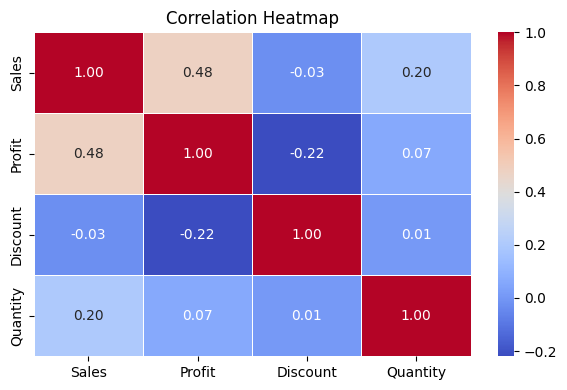

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### Customer Segmentation using KMeans Clustering

In [38]:
# Grouping 
customer_df = df.groupby('Customer ID')[['Sales', 'Profit', 'Discount', 'Quantity']].sum()
customer_df = customer_df.reset_index()

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[['Sales', 'Profit', 'Discount', 'Quantity']])

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

In [42]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
customer_df['PCA1'] = pca_components[:, 0]
customer_df['PCA2'] = pca_components[:, 1]

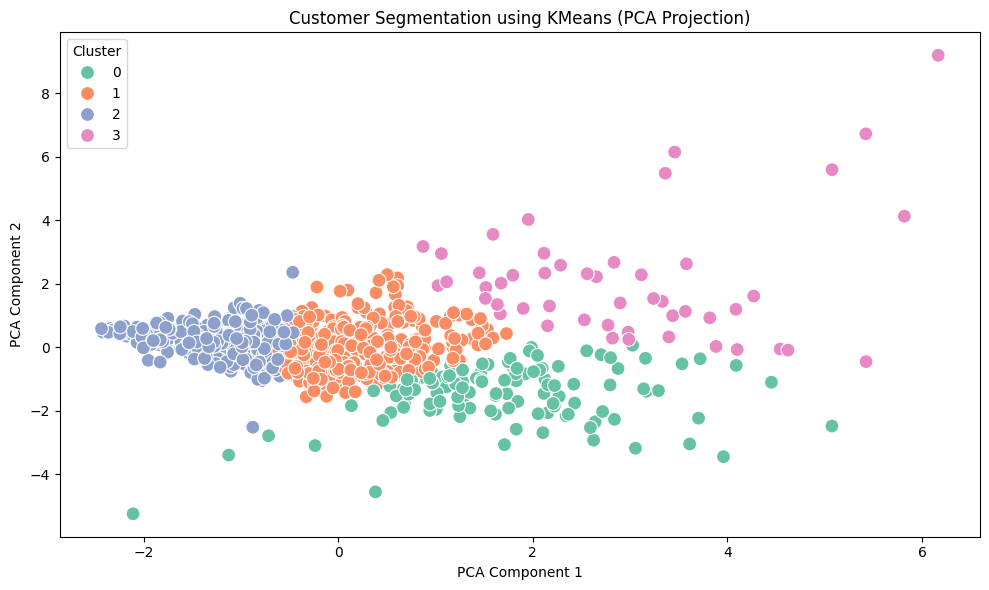

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segmentation using KMeans (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()